In [1]:
import pickle
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data_loc = "../data/rule_based_log_data/flexlab/5_year_flexlab_sars_cleaned_new.csv"
df = pd.read_csv(data_loc)

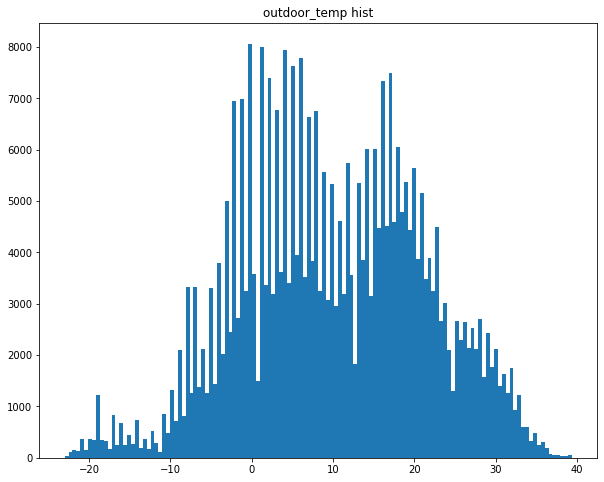

In [3]:
plt.figure(figsize=(10, 8))
plt.title("outdoor_temp hist")
bin_meta_outdoor_temp = plt.hist(df["outdoor_temp"], bins="fd")

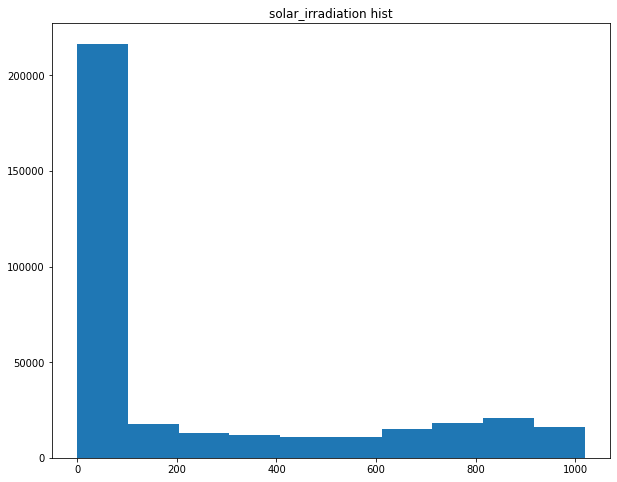

In [4]:
plt.figure(figsize=(10, 8))
plt.title("solar_irradiation hist")
bin_meta_solar = plt.hist(df["solar_irradiation"])

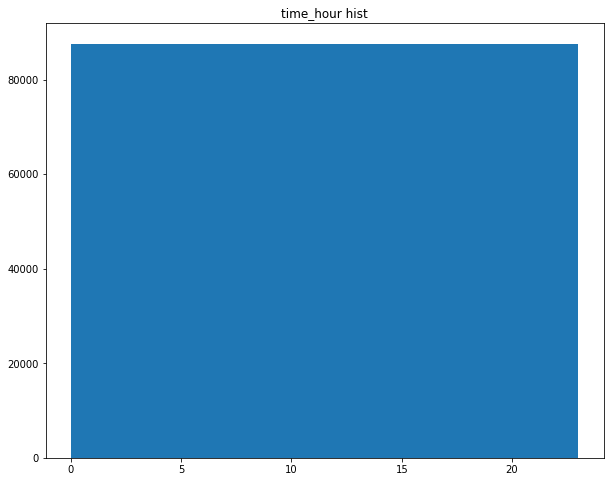

In [5]:
plt.figure(figsize=(10, 8))
plt.title("time_hour hist")
bin_meta_time = plt.hist(df["time_hour"], bins=4)

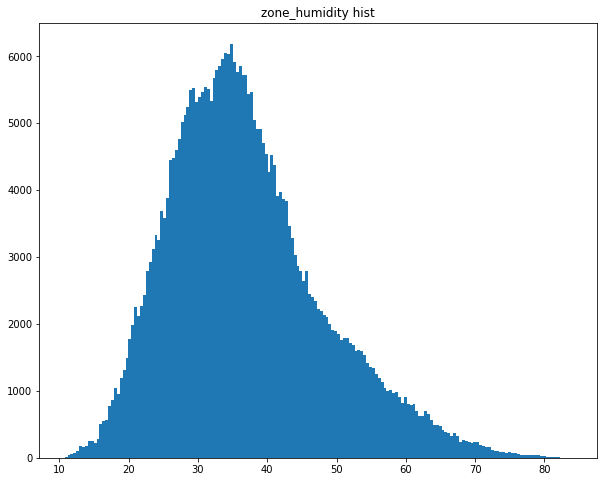

In [6]:
plt.figure(figsize=(10, 8))
plt.title("zone_humidity hist")
bin_meta_humid = plt.hist(df["zone_humidity"], bins=175)

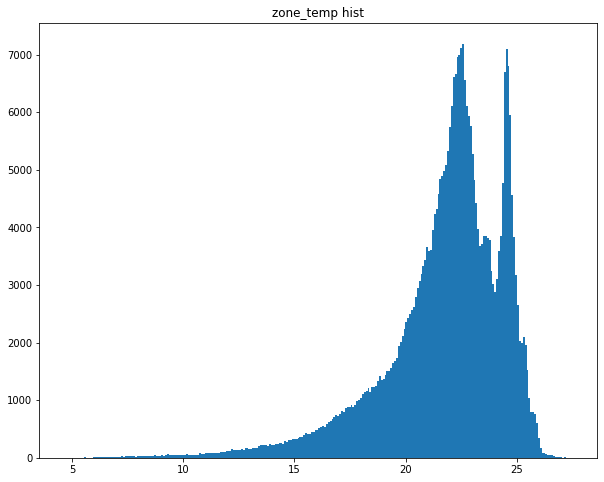

In [7]:
plt.figure(figsize=(10, 8))
plt.title("zone_temp hist")
bin_meta_temp = plt.hist(df["zone_temp"], bins='fd')

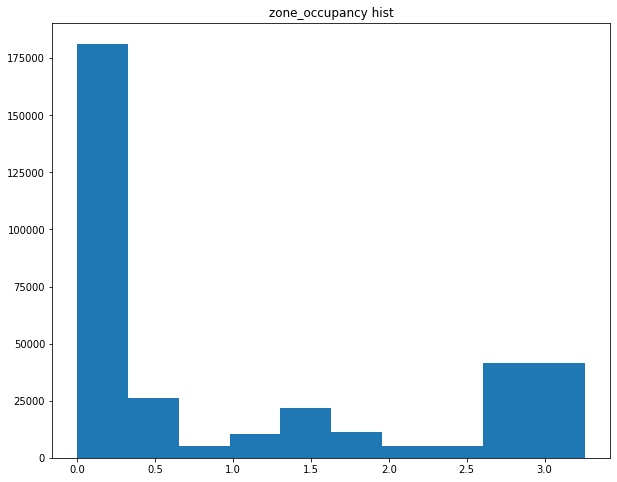

In [8]:
plt.figure(figsize=(10, 8))
plt.title("zone_occupancy hist")
bin_meta_occ = plt.hist(df["zone_occupancy"])

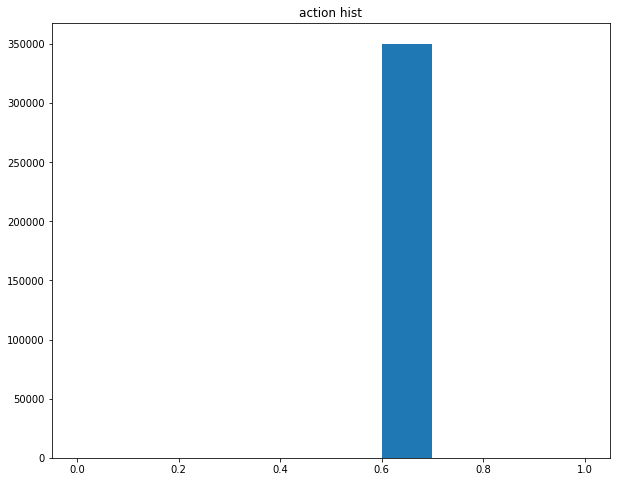

In [17]:
plt.figure(figsize=(10, 8))
plt.title("action hist")
start = 0.0
end = 1.0
width=0.1
ranges = []
for i in range(10):
    ranges.append((start+i*width, start + i*width + width))
bin_meta_action = plt.hist(df["action"], bins=10, range=(0, 1))

In [10]:
bin_meta_action

(array([1148870.,       0., 1283091.,  196024.,       0.,       0.,
              0.,       0.,       0.,       0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

## Action and State-Transition Probability

In [10]:
action_dims = len(df["action"].unique())

# action_prob = np.zeros((len(bin_meta_outdoor_temp[1]), len(bin_meta_solar[1]),
#                         len(bin_meta_time[1]), len(bin_meta_humid[1]),
#                         len(bin_meta_temp[1]), len(bin_meta_occ[1]), action_dims))
action_prob = {}
state_transition_prob = {}

df_dict = df.to_dict("records")  # Doing this is much faster than df.iterrows()

In [11]:
p_bar = tqdm(total=len(df))
for row in df_dict:
    outdoor_temp_bin = np.digitize(row["outdoor_temp"], bin_meta_outdoor_temp[1])-1
    solar_bin = np.digitize(row["solar_irradiation"], bin_meta_solar[1])-1
    time_bin = np.digitize(row["time_hour"], bin_meta_time[1])-1
    humidity_bin = np.digitize(row["zone_humidity"], bin_meta_humid[1])-1
    z_temp_bin = np.digitize(row["zone_temp"], bin_meta_temp[1])-1
    z_occ_bin = np.digitize(row["zone_occupancy"], bin_meta_occ[1])-1

    outdoor_temp_bin_tp1 = np.digitize(row["outdoor_temp_tp1"], bin_meta_outdoor_temp[1])-1
    solar_bin_tp1 = np.digitize(row["solar_irradiation_tp1"], bin_meta_solar[1])-1
    time_bin_tp1 = np.digitize(row["time_hour_tp1"], bin_meta_time[1])-1
    humidity_bin_tp1 = np.digitize(row["zone_humidity_tp1"], bin_meta_humid[1])-1
    z_temp_bin_tp1 = np.digitize(row["zone_temp_tp1"], bin_meta_temp[1])-1
    z_occ_bin_tp1 = np.digitize(row["zone_occupancy_tp1"], bin_meta_occ[1])-1
    
    s_t_str = f"{outdoor_temp_bin},{solar_bin},{time_bin},{humidity_bin},{z_temp_bin},{z_occ_bin}"
    s_tp1_str = f"{outdoor_temp_bin_tp1},{solar_bin_tp1},{time_bin_tp1},{humidity_bin_tp1},{z_temp_bin_tp1},{z_occ_bin_tp1}"
    
#     print(s_t_str)
    
    if s_t_str not in state_transition_prob:
        state_transition_prob[s_t_str] = {}
    if s_tp1_str not in state_transition_prob[s_t_str]:
        state_transition_prob[s_t_str][s_tp1_str] = 0
        
    state_transition_prob[s_t_str][s_tp1_str] += 1
    
    action_bin = np.digitize(row["action"], bin_meta_action[1])-1
    
    
    if s_t_str not in action_prob:
        action_prob[s_t_str] = {}
    if action_bin not in action_prob[s_t_str]:
        action_prob[s_t_str][action_bin] = 0
    
    action_prob[s_t_str][action_bin] += 1
#     action_prob[outdoor_temp_bin, solar_bin, time_bin,
#                 humidity_bin, z_temp_bin, z_occ_bin, action_bin] += 1
    p_bar.update(1)
action_prob["outdoor_temp_bins"] = bin_meta_outdoor_temp[1]
action_prob["solar_irradiation_bins"] = bin_meta_solar[1]
action_prob["time_hour_bins"] = bin_meta_time[1]
action_prob["zone_humidity_bins"] = bin_meta_humid[1]
action_prob["zone_temp_bins"] = bin_meta_temp[1]
action_prob["zone_occupancy_bins"] = bin_meta_occ[1]
action_prob["action_bins"] = bin_meta_action[1]
action_prob["total_count"] = len(df)
state_transition_prob["total_count"] = len(df)
p_bar.close()

  0%|          | 0/350397 [00:00<?, ?it/s]

In [12]:
import pickle
with open("../data/rule_based_log_data/flexlab/action_probs_all_data.pkl", "wb+") as f:
    pickle.dump(action_prob, f)

with open("../data/rule_based_log_data/flexlab/state_trans_prob_all_data.pkl", "wb+") as f:
    pickle.dump(state_transition_prob, f)

In [13]:
action_prob

{'49,0,0,53,196,0': {6: 1},
 '51,0,0,53,195,0': {6: 2},
 '51,0,0,66,198,0': {6: 3},
 '52,0,0,52,194,0': {6: 4},
 '52,0,0,66,197,0': {6: 2},
 '54,0,0,52,194,0': {6: 1},
 '54,0,0,65,197,0': {6: 1},
 '52,0,0,52,193,0': {6: 2},
 '52,0,0,65,197,0': {6: 4},
 '50,0,0,52,192,0': {6: 2},
 '50,0,0,65,196,0': {6: 2},
 '47,0,0,51,191,0': {6: 2},
 '47,0,0,65,195,0': {6: 3},
 '45,0,0,51,190,0': {6: 3},
 '45,0,0,65,195,0': {6: 5},
 '44,0,0,51,189,0': {6: 1},
 '44,0,0,65,194,0': {6: 1},
 '43,0,0,52,188,0': {6: 2},
 '43,0,0,65,193,0': {6: 1},
 '42,0,0,52,187,0': {6: 1},
 '42,0,0,65,192,0': {6: 1},
 '41,0,0,52,186,0': {6: 1},
 '41,0,0,65,191,0': {6: 1},
 '42,0,0,52,184,0': {6: 1},
 '42,0,0,65,190,0': {6: 2},
 '42,0,0,52,183,0': {6: 1},
 '42,0,0,65,189,0': {6: 2},
 '43,0,0,52,182,0': {6: 3},
 '43,0,0,65,188,0': {6: 2},
 '42,0,0,52,181,0': {6: 1},
 '42,0,0,65,187,0': {6: 1},
 '40,0,0,52,180,0': {6: 1},
 '40,0,0,65,186,0': {6: 1},
 '39,0,0,52,179,0': {6: 1},
 '39,0,0,65,186,0': {6: 1},
 '37,0,0,52,178,0': 